In [1]:
import pandas as pd
import numpy as np

from keras.utils import to_categorical
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from sklearn.model_selection import train_test_split


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [2]:
df = pd.read_csv("train.csv")
X_train = np.array(df.iloc[:,1:])
y_train = np.array(df.iloc[:,0])

X_train = np.reshape(X_train,(-1,28,28,1))
def create_dev_set(X_train, Y_train):
    ## split 42000 into 35000 and 7000(0.16)
    return train_test_split(X_train, Y_train, test_size = 0.166, random_state = 0)
X_train, X_dev, y_train, y_dev = create_dev_set(X_train, y_train)
print('Training data shape : ', X_train.shape, y_train.shape)
print('Dev data shape : ', X_dev.shape, y_dev.shape)

Training data shape :  (35028, 28, 28, 1) (35028,)
Dev data shape :  (6972, 28, 28, 1) (6972,)


In [0]:
X_train = X_train.astype('float32')
X_dev = X_dev.astype('float32')
X_train = X_train / 255.
X_dev = X_dev / 255.

y_train_one_hot = np.array(to_categorical(y_train))
y_dev_one_hot = np.array(to_categorical(y_dev))

In [3]:
!pip install tensorflow==1.14.0


     |████████████████████████████████| 109.2MB 38kB/s 
     |████████████████████████████████| 3.2MB 45.8MB/s 
     |████████████████████████████████| 491kB 33.4MB/s 
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorflow 2.2.0rc2
    Uninstalling tensorflow-2.2.0rc2:
      Successfully uninstalled tensorflow-2.2.0rc2


In [4]:

batch_size = 64
epochs = 30
num_classes = 10

dr = Sequential()
dr.add(Conv2D(32, kernel_size=(3,3),activation='linear',input_shape=(28,28,1),padding='same'))
dr.add(BatchNormalization(axis=-1))
dr.add(LeakyReLU(alpha=0.1))
dr.add(MaxPooling2D((2,2),padding='same'))
dr.add(Dropout(0.3))
dr.add(Conv2D(64, (3,3), activation='linear',padding='same'))
dr.add(BatchNormalization(axis=-1))
dr.add(LeakyReLU(alpha=0.1))
dr.add(MaxPooling2D(pool_size=(2,2),padding='same'))
dr.add(Dropout(0.3))
dr.add(Conv2D(128, (3,3), activation='linear',padding='same'))
dr.add(BatchNormalization(axis=-1))
dr.add(LeakyReLU(alpha=0.1))                  
dr.add(MaxPooling2D(pool_size=(2,2),padding='same'))
dr.add(Dropout(0.4))
dr.add(Flatten())
dr.add(Dense(120, activation='linear'))
dr.add(BatchNormalization(axis=-1))
dr.add(LeakyReLU(alpha=0.1))         
dr.add(Dropout(0.3))         
dr.add(Dense(40, activation='linear'))
dr.add(BatchNormalization(axis=-1))
dr.add(LeakyReLU(alpha=0.1))         
dr.add(Dropout(0.2)) 
dr.add(Dense(num_classes, activation='softmax'))

dr.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

dr.summary()









Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496   

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 35028 samples, validate on 6972 samples
Epoch 1/30
35028/35028 [==============================] - 99s 3ms/step - loss: 0.5281 - acc: 0.8501 - val_loss: 0.0988 - val_acc: 0.9706
Epoch 2/30
35028/35028 [==============================] - 98s 3ms/step - loss: 0.1595 - acc: 0.9553 - val_loss: 0.0494 - val_acc: 0.9839
Epoch 3/30
35028/35028 [==============================] - 98s 3ms/step - loss: 0.1184 - acc: 0.9649 - val_loss: 0.0533 - val_acc: 0.9838
Epoch 4/30
35028/35028 [==============================] - 99s 3ms/step - loss: 0.0968 - acc: 0.9708 - val_loss: 0.0338 - val_acc: 0.9902
Epoch 5/30
35028/35028 [==============================] - 98s 3ms/step - loss: 0.0894 - acc: 0.9734 - val_loss: 0.0342 - val_acc: 0.9900
Epoch 6/30
35028/35028 [==============================] - 98s 3ms/step - loss: 0.0795 - acc: 0.9764 - val_loss: 0.0333 - val_acc: 0.9897
Epoch 7/30
35028/35028 [===========

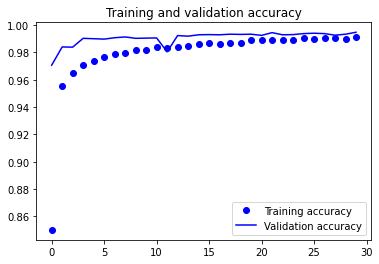

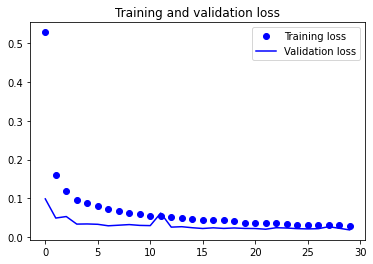

In [5]:

training = dr.fit(X_train, y_train_one_hot, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_dev, y_dev_one_hot))

dr.save("Conv2D_DR_dropout.h5py")

test_eval = dr.evaluate(X_dev, y_dev_one_hot, verbose=0)
print(test_eval)

accuracy = training.history['acc']
val_accuracy = training.history['val_acc']
loss = training.history['loss']
val_loss = training.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [6]:
print("Training dataset evaluation")
test_eval = dr.evaluate(X_train, y_train_one_hot, verbose=0)
print(test_eval)

print("Dev dataset evaluation")
test_eval = dr.evaluate(X_dev, y_dev_one_hot, verbose=0)
print(test_eval)

Training dataset evaluation
[0.003945918140605195, 0.9990007993605116]
Dev dataset evaluation
[0.0188058250699439, 0.99469305794607]
